### 해당모델 관련한 내용

#### 계층적 군집화 모델
- 계층적 군집화는 계층적으로 포함 관계인 군집을 병합하거나 분할하는 군집화 알고리즘
- 군집 계층은 트리 또는 덴드로그램 형태로 시각화
- 이 트리의 루트 노드는 모든 샘플로 구성된 단일 군집이며, 이 루트 노드의 자식 노드로 진행할수록 점점 더 많은 군집으로 분할됨

#### 계층적 군집화 모델 이론

- 병합적 군집화에서는 가까운 군집끼리 묶어 새로운 군집을 형성하므로 두 점 사이의 거리를 정의한 후 두 점 사이의 거리를 이용하여 군집 사이의 거리를 정의해야 한다.

- 두 샘플 사이의 거리
    - 두 샘플이 주어졌을 때 그 두 샘플 사이의 거리 메트릭을 정의/ 보통 유클리드, L1, L2, 코사인 거리 등을 사용

- 군집 사이의 거리
    - 연결법은 샘플 간 거리를 정의한 상태에서 두 군집 사이의 거리를 정의한 것으로, 단일 연결법, 최장 연결법, 평균 연결법, 와드 연결법 등 다양한 방식이 있음

### 계층적 군집화 모델 파라미터

- sklearn.cluster.AgglomerativeClustering 클래스는 병합적 군집화 기법을 구현한다.
- AgglomerativeClustering 클래스의 주요 하이퍼파라미터는 다음과 같다.

<하이퍼파라미터>
- n_clusters (default: 2) -> 생성할 군집 수
- affinity (default: 'euclidean') -> 연결에 사용할 메트릭
  - 'percomputed' 사용자 지정 거리 행렬 사용. 이때 fit() 메서드가 유사도 행렬 대신 거리 행렬을 인자로 받게 된다.
  - 그 외 'l1', 'l2', 'manhattan', 'cosine'이 있음
- linkage (default: ward) -> 연결법 선택, 각각 와드 연결법, 완전 연결법, 평균 연결법, 단일 연결법을 의미함. 'ward'일 때는 affinity = 'euclidean'로 설정해야 한다.
  - Complete Linkage (최장 연결): 두 군집 간 최대 거리를 사용하여 클러스터 간의 거리를 측정
  - Single Linkage (최단 연결): 두 군집 간 최소 거리를 사용하여 클러스터 간의 거리를 측정
  - Average Linkage (평균 연결): 두 군집 간의 평균 거리를 사용하여 클러스터 간의 거리를 측정
  - Centroid Linkage (중심 연결): 두 군집의 중심 간 거리를 사용하여 클러스터 간의 거리를 측정
  
- distance_threshold (default: None) -> 군집화 기준 거리 설정. 군집의 범위를 제어하는 값
    - None 모든 거리에 대해 군집화를 수행하여 데이터 전체가 1개의 군집으로 병합될 때까지 계층 구조를 형성함
    - float 거리가 이 값 이상인 군집은 병합하지 않는다. n_clusters가 None이어야 동작함

### 예시코드

- AgglomerativeClustering 클래스를 이용해 병합적 군집 분석을 수행하고 scipy.dendrogram()함수로 이 결과를 덴드로그램으로 나타냄
- 붓꽃 데이터셋을 사용함

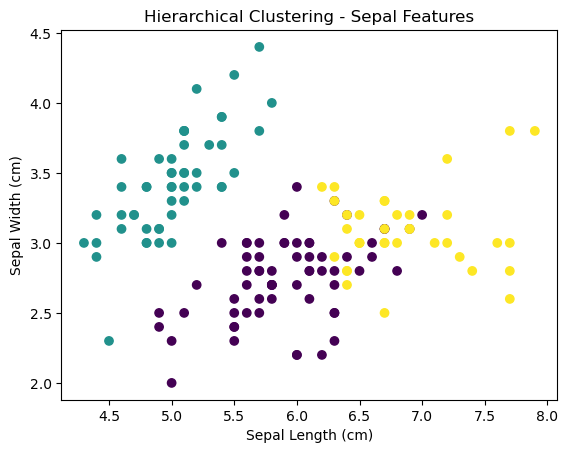

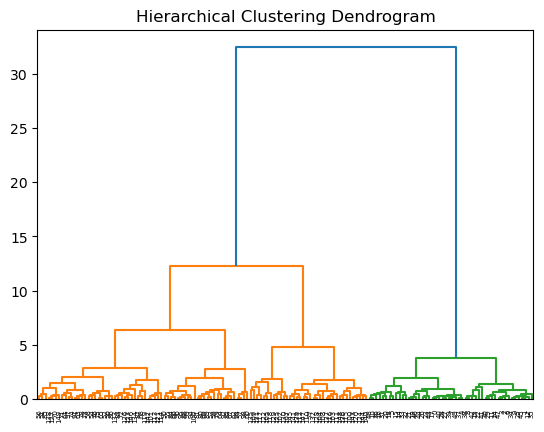

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Iris 데이터 불러오기
iris = load_iris()
X = iris.data
feature_names = iris.feature_names

# 계층적 군집화 모델 생성
model = AgglomerativeClustering(n_clusters=3, linkage='ward')  # linkage는 여러 옵션 중 하나를 선택할 수 있음.

# 모델에 데이터 학습
labels = model.fit_predict(X)

# 결과 출력
df = pd.DataFrame(X, columns=feature_names)
df['Cluster'] = labels

# 군집 결과 시각화
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Hierarchical Clustering - Sepal Features')
plt.show()

# 덴드로그램 시각화
linked = linkage(X, 'ward')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()